# Работа над изображениями

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [55]:
import numpy as np
import cv2
from billiard import Process, forking_enable

def cam():
    cap = cv2.VideoCapture(0)
    while True:
        
        _, frame = cap.read()
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        #kernel = (np.ones(15,15), np.float32) / 225
        
        lower_red = np.array([10,150,0])
        upper_red = np.array([25,200,255])
        
        mask = cv2.inRange(hsv,lower_red,upper_red)
        res = cv2.bitwise_and(frame,frame,mask=mask)
        
        cv2.imshow('img', hsv)
        cv2.imshow('mask', mask)
        cv2.imshow('res',res)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("1"):
            cap.release()        
            cv2.destroyAllWindows()
            break

            
forking_enable(0)
camProcess = Process(target=cam)
camProcess.start()
        

## Изменение цветовых схем
---
Для изменеия цвета используется **`cv2.cvtColor(image,flag)`**
___

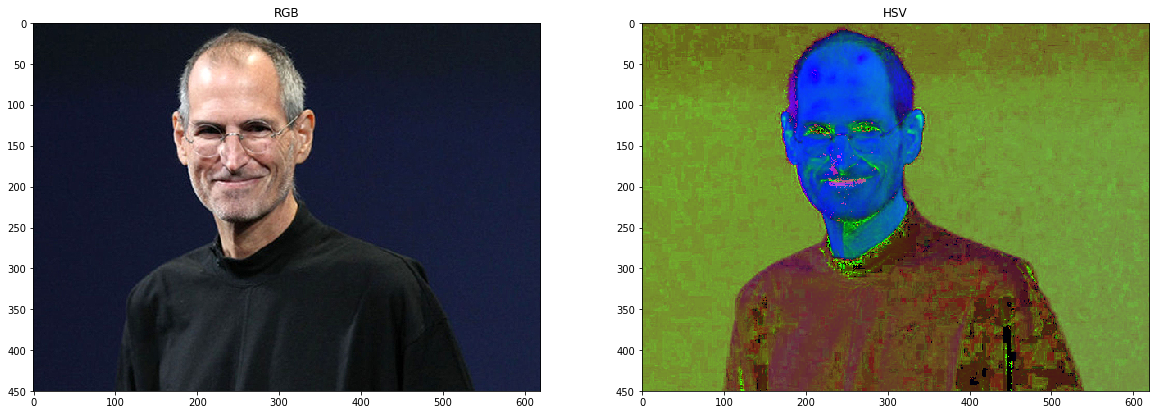

In [2]:
img = cv2.imread('img/jobscol.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.title("RGB")
plt.imshow(img)

plt.subplot(122)
plt.title('HSV')
plt.imshow(hsv)

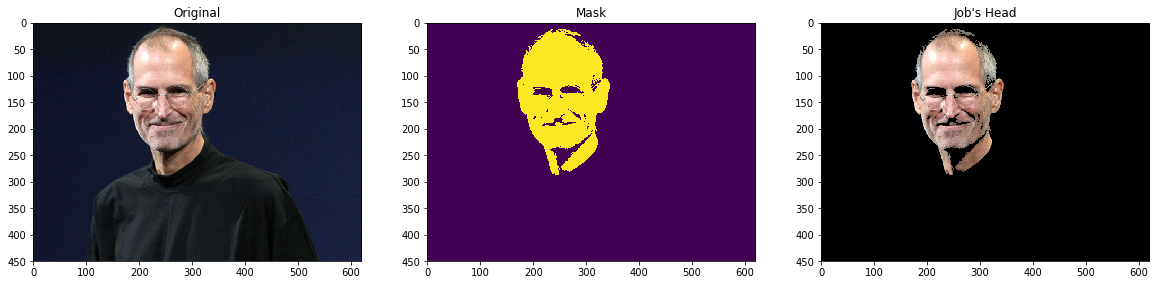

In [3]:
lower_blue = np.array([0,0,110])
upper_blue = np.array([255,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(img,img, mask= mask)

plt.figure(figsize=(20,20))

plt.subplot(131)
plt.title('Original')
plt.imshow(img)

plt.subplot(132)
plt.title('Mask')
plt.imshow(mask)

plt.subplot(133)
plt.title("Job's Head")
plt.imshow(res)

## Image Thresholding

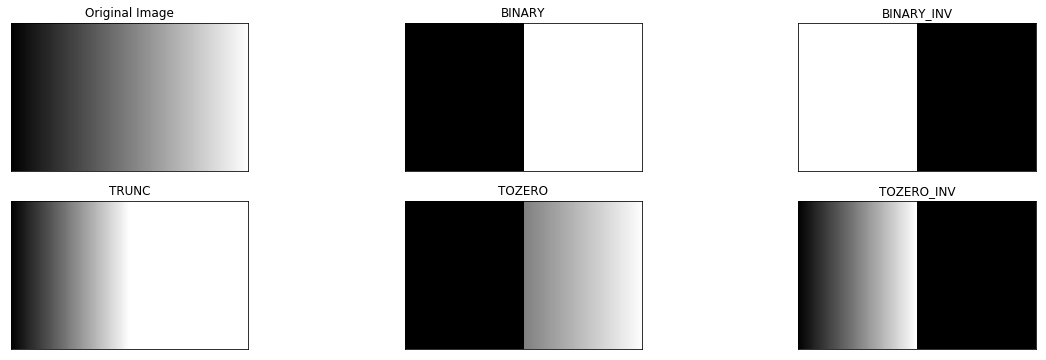

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


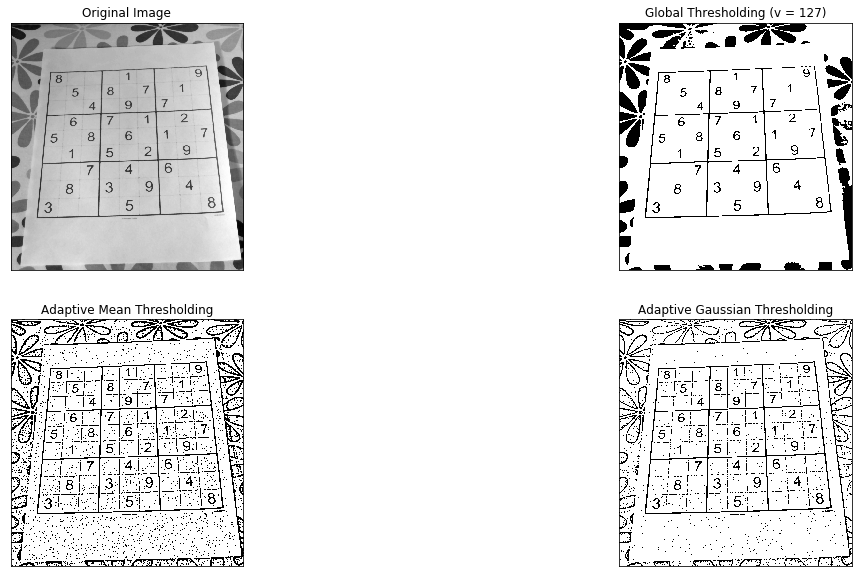

In [5]:
img = cv2.imread('img/sudoku.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(20,10))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],cmap='gray')

plt.show()

# Geometric Transformations of Images
---
**`cv2.getPerspectiveTransform`**, **`cv2.warpAffine`**, **`cv2.warpPerspective`**

**`cv2.warpAffine`** 2x3 transformation matrix as input

**`cv2.warpPerspective`** 3x3 transformation matrix as input
___

## Scaling
---
**`cv2.resize`**

Interpolation methods:

* **`cv2.INTER_AREA`** -  for shrinking

* **`cv2.INTER_CUBIC`** - for zooming

* **`cv2.INTER_LINEAR`** - by default for all resizing purposes
___

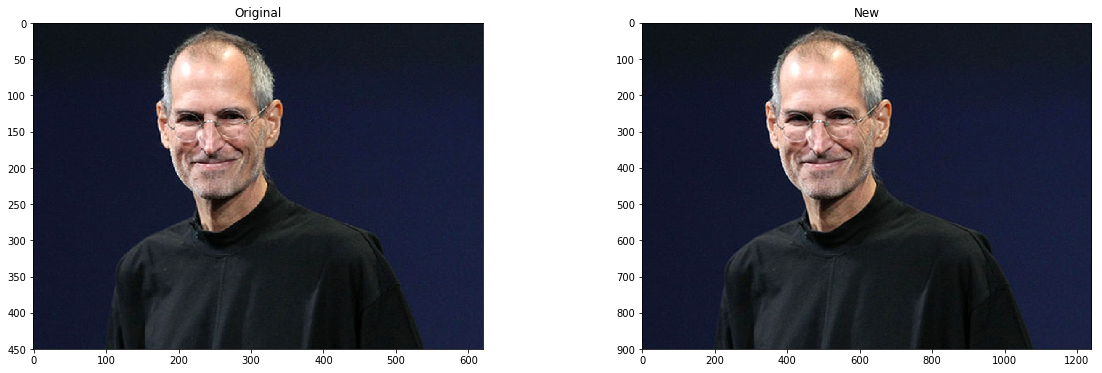

In [6]:
img = cv2.imread('img/jobscol.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.title('New')
plt.imshow(res)


## Translation
Translation is the shifting of object’s location. If you know the shift in **(x,y)** direction, let it be **(t_x,t_y)**, you can create the transformation matrix **M** as follows:

\begin{equation*}
\mathbf{M} = \begin{vmatrix}
1 & 0 & t_x \\
0 & 1 & t_y 
\end{vmatrix}
\end{equation*}


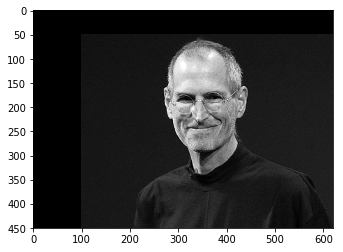

In [7]:
img = cv2.imread('img/jobscol.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst,cmap='gray')

## Rotation
Rotation of an image for an angle \theta is achieved by the transformation matrix of the form:


\begin{equation*}
\mathbf{M}=  \begin{vmatrix}
\cos\theta &  -\sin\theta  \\
\sin\theta &  -\cos\theta
\end{vmatrix}
\end{equation*}

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by:

\begin{equation*}
\mathbf{M}=  \begin{vmatrix}
\alpha &  \beta & (1-\alpha)*center.x-\beta*center.y\\
-\beta &  \alpha & \beta*center.x+(1-\alpha)*center.y)
\end{vmatrix}
\end{equation*}

where:
\begin{equation*}
\mathbf{\alpha} = scale*\cos\theta,\\
\mathbf{\beta} = scale*\sin\theta
\end{equation*}

To find this transformation matrix, OpenCV provides a function,**`cv2.getRotationMatrix2D()`**

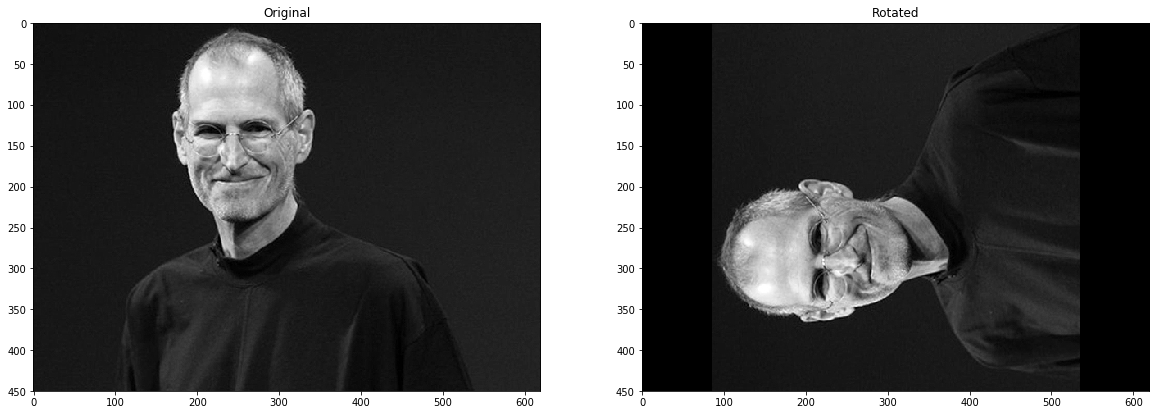

In [8]:
img = cv2.imread('img/jobscol.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Original")
plt.imshow(img,cmap='gray')

plt.subplot(122)
plt.title("Rotated")
plt.imshow(dst,cmap='gray')

## Affine Transformation

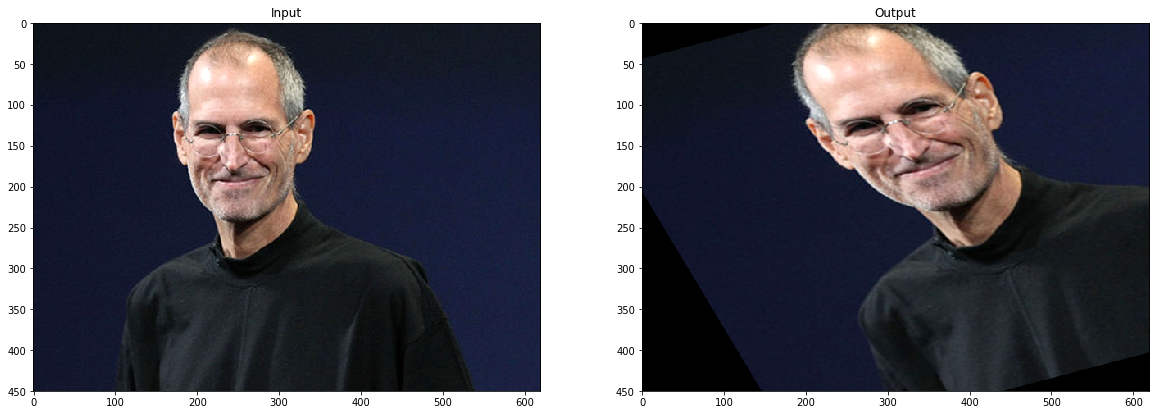

In [9]:
img = cv2.imread('img/jobscol.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transformation
---
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.
___

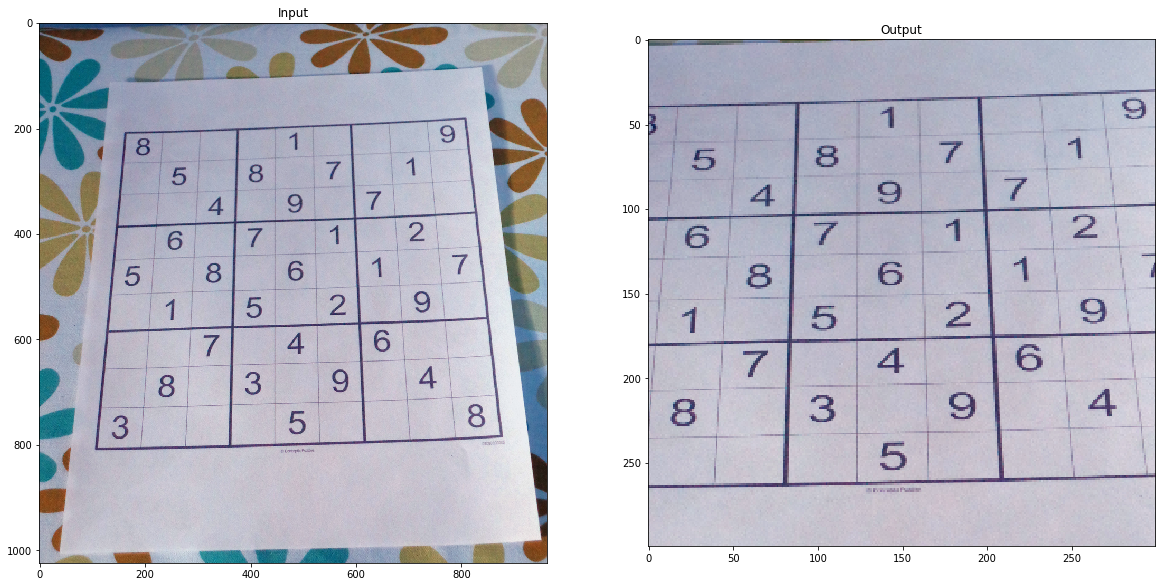

In [10]:
img = cv2.imread('img/sudoku.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[200,100],[800,100],[200,900],[800,900]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Smoothing Images
## Goals
### Learn to:
* Blur imagess with various low pass filters
* Apply custom-made filters to images (2D convolution)


## 2D Convolution ( Image Filtering )
---
As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

OpenCV provides a function, **`cv2.filter2D()`**, to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:

\begin{equation*}
K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}
\end{equation*}

Filtering with the above kernel results in the following being performed: for each pixel, a 5x5 window is centered on this pixel, all pixels falling within this window are summed up, and the result is then divided by 25. This equates to computing the average of the pixel values inside that window. This operation is performed for all the pixels in the image to produce the output filtered image. Try this code and check the result:

___

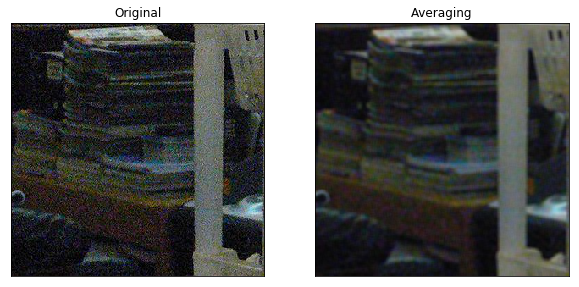

In [11]:
img = cv2.imread('img/noise.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## 1. Averaging
---
This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function **`cv2.blur()`** or **`cv2.boxFilter()`**. Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like this:

\begin{equation*}
K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation*}
Check the sample demo below with a kernel of 5x5 size:

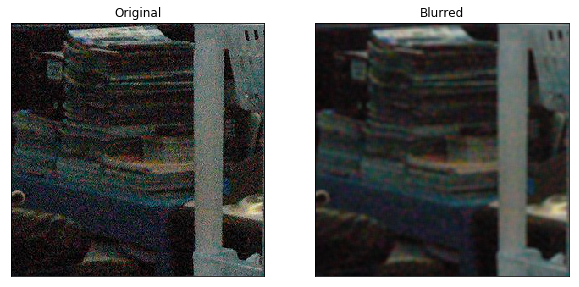

In [12]:
img = cv2.imread('img/noise.jpg')

blur = cv2.blur(img,(5,5))

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 2. Gaussian Filtering
---
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, **`cv2.GaussianBlur()`**. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, **`cv2.getGaussianKernel()`**.

The above code can be modified for Gaussian blurring:

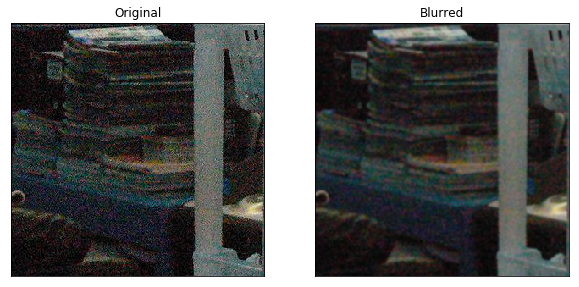

In [13]:
blur = cv2.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Median Filtering
---
Here, the function **`cv2.medianBlur()`** computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.
___

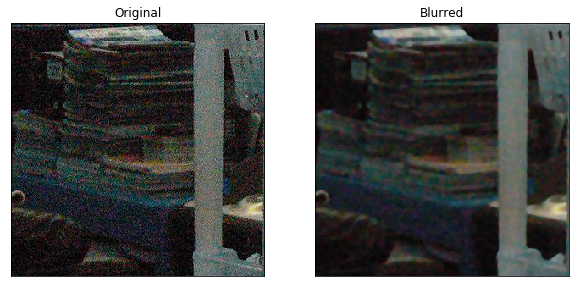

In [15]:
blur = cv2.medianBlur(img,5)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()